In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy.stats as scs
import gc 

from importlib import reload
%matplotlib inline

import base
import utility

# 2. EUR/JPY Pair 2000-2018_Feb

In [2]:
if True:
    # Import USD/JPY hourly data
    data = pd.read_csv('fx_data/EURJPY/EURJPY_2002-201802_hour.csv', header=0)
    data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

In [3]:
ta = None
r_periods = [1, 2, 6, 24, 120, 240, 480, 2400]
ta = base.TechnicalAnalysisCase(data)
ta.add_returns(r_periods)

In [4]:
ta.data.describe()

,open,high,low,close,-1P_return,+1P_return,-2P_return,+2P_return,-6P_return,+6P_return,-24P_return,+24P_return,-120P_return,+120P_return,-240P_return,+240P_return,-480P_return,+480P_return,-2400P_return,+2400P_return
count,94995.000000,94995.000000,94995.000000,94995.000000,94994.000000,94994.000000,94993.000000,94993.000000,94989.000000,94989.000000,94971.000000,94971.000000,94875.000000,94875.000000,94755.000000,94755.000000,94515.000000,94515.000000,92595.000000,92595.000000
mean,130.852528,130.986109,130.715290,130.852719,0.000256,0.000256,0.000509,0.000509,0.001512,0.001512,0.006145,0.006145,0.031733,0.031733,0.062244,0.062244,0.127673,0.127673,0.655955,0.655955
std,15.842361,15.844580,15.844882,15.842360,0.159702,0.159702,0.224868,0.224868,0.384568,0.384568,0.765679,0.765679,1.658665,1.658665,2.311775,2.311775,3.284183,3.284183,7.713459,7.713459
min,94.184000,94.271000,67.250000,94.182000,-5.064872,-5.064872,-5.677166,-5.677166,-8.550253,-8.550253,-8.734347,-8.734347,-17.037037,-17.037037,-17.718533,-17.718533,-25.362603,-25.362603,-30.854711,-30.854711
25%,120.429500,120.606500,120.230000,120.428000,-0.063730,-0.063730,-0.090852,-0.090852,-0.169047,-0.169047,-0.375575,-0.375575,-0.876111,-0.876111,-1.227414,-1.227414,-1.679372,-1.679372,-3.083695,-3.083695
50%,132.008000,132.130000,131.878000,132.006000,0.000000,0.000000,0.003258,0.003258,0.008138,0.008138,0.036208,0.036208,0.116174,0.116174,0.192430,0.192430,0.305129,0.305129,1.584728,1.584728
75%,138.500000,138.605500,138.390000,138.500000,0.067010,0.067010,0.095625,0.095625,0.179324,0.179324,0.416249,0.416249,1.004298,1.004298,1.451331,1.451331,2.063085,2.063085,5.238130,5.238130
max,169.820000,170.000000,169.720000,169.810000,3.277005,3.277005,4.022272,4.022272,5.782569,5.782569,9.176369,9.176369,11.414566,11.414566,12.254902,12.254902,11.700687,11.700687,26.883356,26.883356


In [5]:
del data
gc.collect()

792

## Overall Price Movment during the whole period

Range: 67.25 ~ 170.00


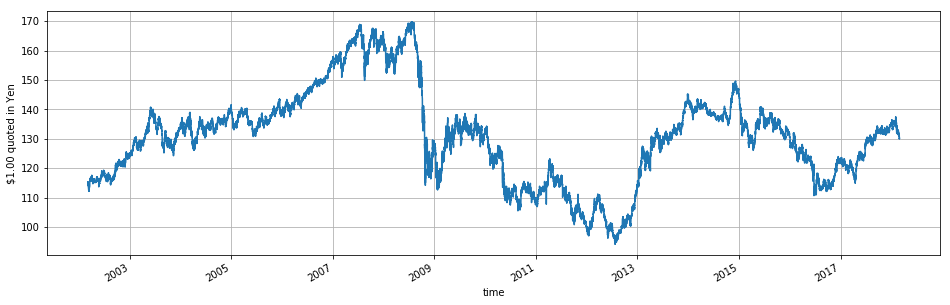

In [6]:
df = ta.data.iloc[:, :5].set_index('time')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
df['close'].plot(ax=ax)
ax.set_ylabel('$1.00 quoted in Yen')
ax.grid(True)

max_price = np.max(df['high'])
min_price = np.min(df['low'])
print('Range: %.2f ~ %.2f' % (min_price, max_price))

Overall, USD/EUR traded between 67-170 during this period of ~15 years. It appears there are both upward and downward trends in a medium term (~a few years). 

## Check the distribution of returns for a given period

In this analysis, trailing returns (i.e. returns up to th current timepoint) and the future returns from the current timepoint) were examined. Their distributions were visually examined and checked for normality.

In [7]:
plus_labels = [col for col in ta.data.columns if 'return' in col and '+' in col]
minus_labels = [col for col in ta.data.columns if 'return' in col and '-' in col]
return_labels = minus_labels + plus_labels
print(plus_labels)
print(minus_labels)

['+1P_return', '+2P_return', '+6P_return', '+24P_return', '+120P_return', '+240P_return', '+480P_return', '+2400P_return']
['-1P_return', '-2P_return', '-6P_return', '-24P_return', '-120P_return', '-240P_return', '-480P_return', '-2400P_return']


### Try fitting to normal distribution

===== Basic Stats for +1P_return  =====
# of observations:	94994
Range:			-5.065% ~ 3.277%
Average:			0.000% +/- 0.160
Normality p-val	0.000
Kurtosis:			34.523
Skewness:		-0.361
===== Basic Stats for +2P_return  =====
# of observations:	94993
Range:			-5.677% ~ 4.022%
Average:			0.001% +/- 0.225
Normality p-val	0.000
Kurtosis:			29.828
Skewness:		-0.306
===== Basic Stats for +6P_return  =====
# of observations:	94989
Range:			-8.550% ~ 5.783%
Average:			0.002% +/- 0.385
Normality p-val	0.000
Kurtosis:			20.900
Skewness:		-0.410
===== Basic Stats for +24P_return  =====
# of observations:	94971
Range:			-8.734% ~ 9.176%
Average:			0.006% +/- 0.766
Normality p-val	0.000
Kurtosis:			9.341
Skewness:		-0.273
===== Basic Stats for +120P_return  =====
# of observations:	94875
Range:			-17.037% ~ 11.415%
Average:			0.032% +/- 1.659
Normality p-val	0.000
Kurtosis:			8.030
Skewness:		-0.548
===== Basic Stats for +240P_return  =====
# of observations:	94755
Range:			-17.719% ~ 12.255%
Average:			0

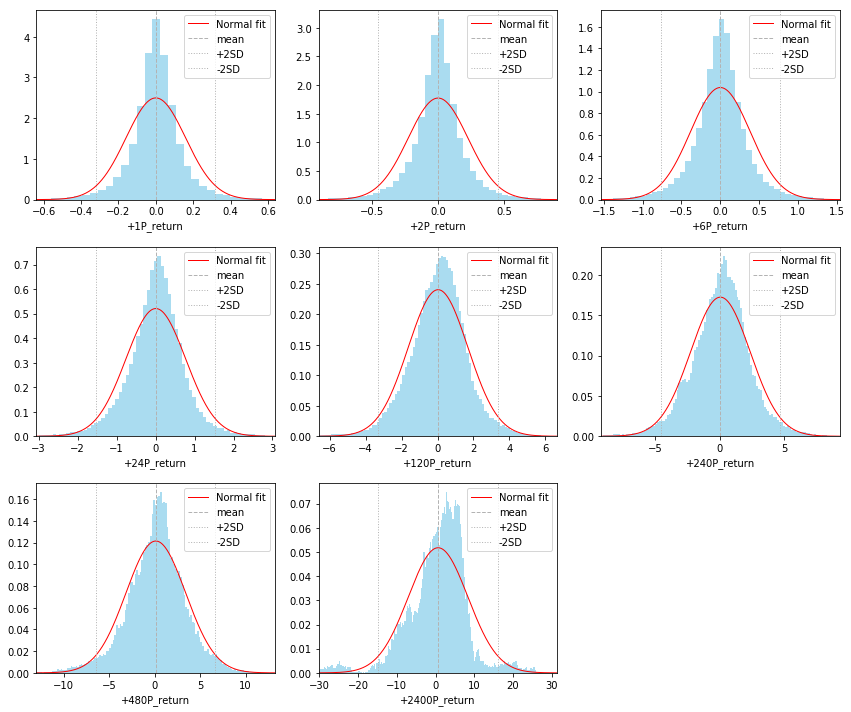

In [8]:
fig = plt.figure(figsize=(12, 10))
for i, label in enumerate(plus_labels):
    series =  np.array(ta.data[label].dropna())
    
    _, pval = scs.normaltest(series)
    nobs, minmax, mean, var, skewness, kurtosis = scs.describe(series)
    std = math.sqrt(var)
    minimum = minmax[0]
    maximum = minmax[1]
    
    print('='*5, 'Basic Stats for %s ' % label, '='*5)
    print('# of observations:\t%d' % nobs)
    print('Range:\t\t\t%.3f%% ~ %.3f%%' % (minimum, maximum))
    print('Average:\t\t\t%.3f%% +/- %.3f' % (mean, std))
    print('Normality p-val\t%.3f' % pval)
    print('Kurtosis:\t\t\t%.3f' % (kurtosis+3))
    print('Skewness:\t\t%.3f' % skewness)
    
    
    m, s = scs.norm.fit(series)
    rv = scs.norm(loc=m, scale=s)
    x_min = 1.2*np.min(series)
    x_max = 1.2*np.max(series)
    x = np.linspace(x_min, x_max, 5000)
    
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(series, bins=200, density=1, color='skyblue', alpha=0.7, label='')
    ax.plot(x, rv.pdf(x), 'k-', lw=1, color='red', label='Normal fit')
    
    ax.axvline(m, ls='--', lw=1, color='0.7', label='mean')
    ax.axvline(m+2*s, ls=':', lw=1, color='0.7', label='+2SD')
    ax.axvline(m-2*s, ls=':', lw=1, color='0.7', label='-2SD')
    ax.set_xlabel('%s' % label)
    ax.set_xlim([mean-4*std, mean+4*std])
    ax.legend()
plt.tight_layout()

Like the USD-JPY pair, the returns don't fit well to normal distributions. Now the longer term return have some skewness.

### Try fitting to t-distribution with df=10

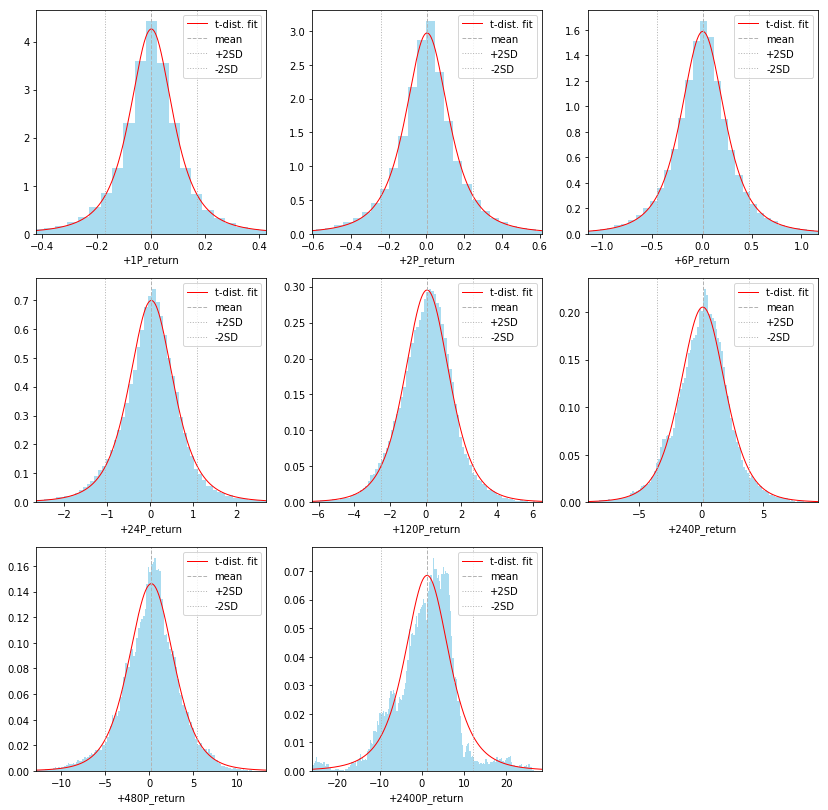

In [9]:
fig = plt.figure(figsize=(14, 14))
for i, label in enumerate(plus_labels):
    series = np.array(ta.data[label].dropna())

    df, mean, std = scs.t.fit(series, 10)
    rv = scs.t(df, loc=mean, scale=std)
    x_min = 1.2*np.min(series)
    x_max = 1.2*np.max(series)
    x = np.linspace(x_min, x_max, 5000)
    
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(series, density=1, bins=200, color='skyblue', alpha=0.7)
    ax.plot(x, rv.pdf(x), 'k-', lw=1, color='red', label='t-dist. fit')
    
    ax.axvline(mean, ls='--', lw=1, color='0.7', label='mean')
    ax.axvline(mean+2*std, ls=':', lw=1, color='0.7', label='+2SD')
    ax.axvline(mean-2*std, ls=':', lw=1, color='0.7', label='-2SD')
    ax.set_xlabel('%s' % label)
    ax.set_xlim([mean-5*std, mean+5*std])
    ax.legend()

t-distribution seems to fit well up to ~10 day returns, but start to deviate slightly around ~20days.

In [10]:
for i, label in enumerate(plus_labels):
    series =  ta.data[label].dropna()
    
    _, pval_norm = scs.kstest(np.array(series), 'norm')
    _, pval_logistic = scs.kstest(np.array(series), 'logistic')
    _, pval_hyp = scs.kstest(np.array(series), 'hypsecant')
    _, pval_laplace = scs.kstest(np.array(series), 'laplace')
    
    print('='*5, 'Kolmogorov-Smirnov Test %s ' % label, '='*5)
    print('Normal Distribution:\t\t\tp-val = %f' % pval_norm)
    print('Logistic Distribution:\t\t\tp-val = %f' % pval_logistic)
    print('Hyperbolic Secant Distribution:\tp-val = %f' % pval_hyp)
    print('Laplace Distribution:\t\t\tp-val = %f' % pval_laplace)

===== Kolmogorov-Smirnov Test +1P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +2P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +6P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +24P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-val = 0.000000
Hyperbolic Secant Distribution:	p-val = 0.000000
Laplace Distribution:			p-val = 0.000000
===== Kolmogorov-Smirnov Test +120P_return  =====
Normal Distribution:			p-val = 0.000000
Logistic Distribution:			p-va

t-distribution apperas to fit well after all

## Assessing auto-correlation by visualization

Here I'm assessing if there is any correlation between trailing and future returns. This is an informal test for auto-correlation, where whether the past performance for a given period is any predicitive of the future performance for a given period. Auto-correlation should be formally tested with autoregressive models (AR, etc)

Evaluate if trailing returns (returns up to a timepoint) correlate with future returns (return from a timepoint). The former is indicated with '-' sign and the latter with '+' in the DataFrame labels. In this notebook, 1, 2, and 6 hours, as well as 1, 5, 10, 20, and 100 day returns of both kinds were tracked. Trailing returns are scattered against future returns and Pearson's correlations were calculated.

CPU times: user 12.7 s, sys: 7.73 s, total: 20.5 s
Wall time: 9.82 s


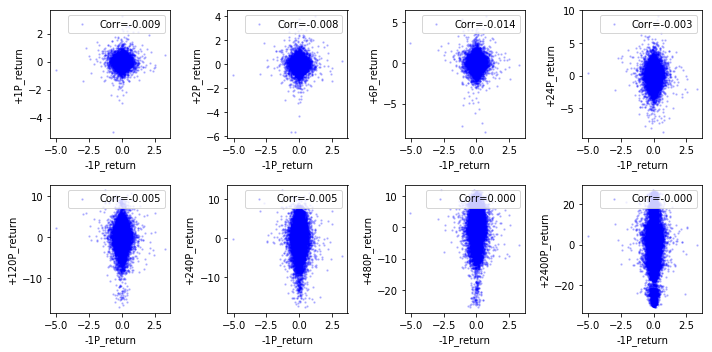

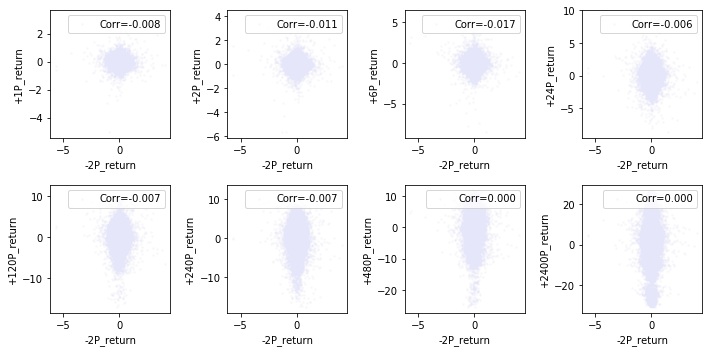

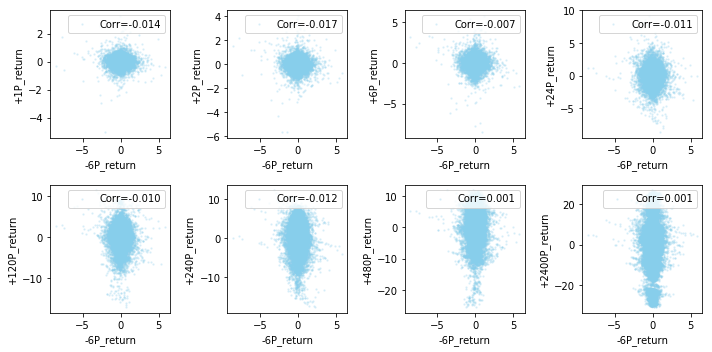

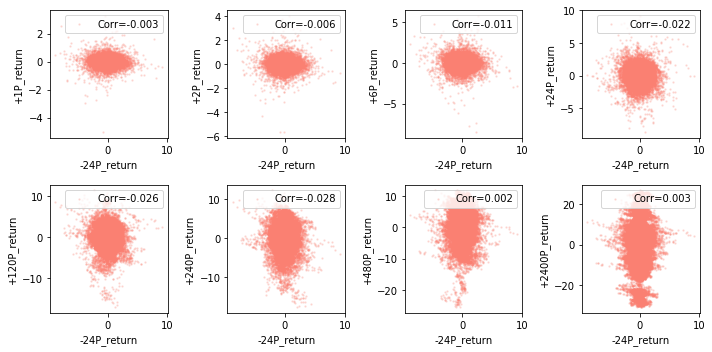

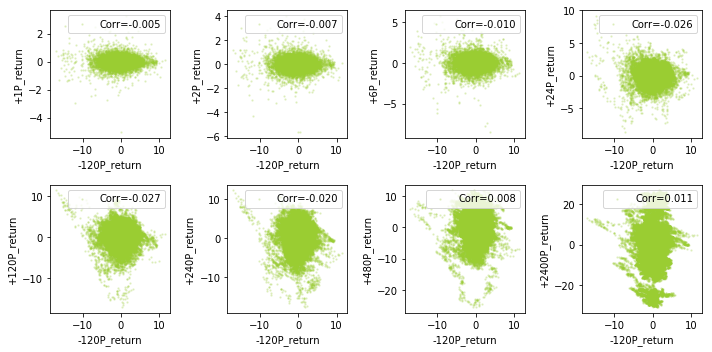

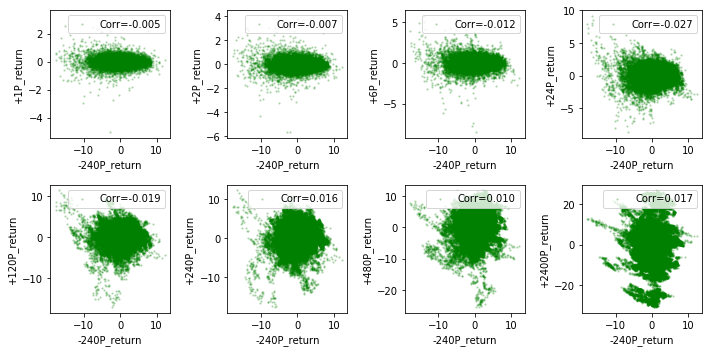

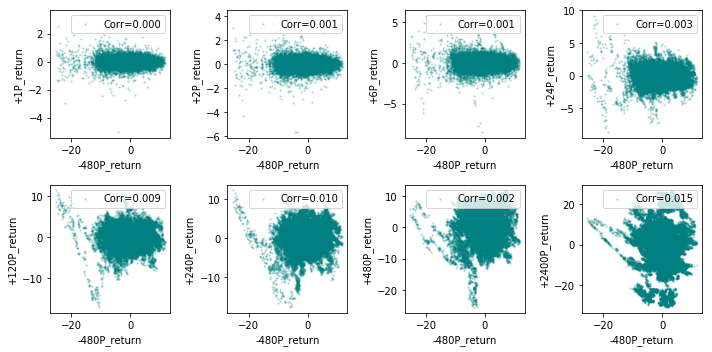

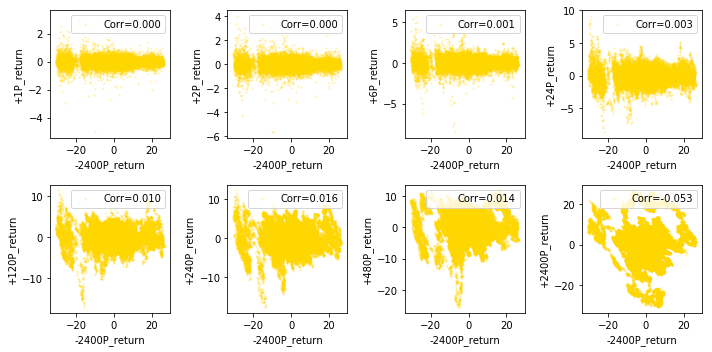

In [11]:
%%time
colors = ['blue', 'lavender', 'skyblue', 'salmon', 'yellowgreen', 'green', 'teal', 'gold']
for i, minus_r in enumerate(minus_labels):
    fig = plt.figure(figsize=(10, 5))
    for j, plus_r in enumerate(plus_labels):
        ax = fig.add_subplot(2, 4, j+1)
        pearson = ta.data[minus_r].corr(ta.data[plus_r])
        ax.scatter(ta.data[minus_r], ta.data[plus_r], color=colors[i], s=2, alpha=0.2, label=('Corr=%.3f' % pearson))
        ax.set_xlabel(minus_r)
        ax.set_ylabel(plus_r)
        ax.legend(loc='upper right')
    plt.tight_layout()

This currency pair is quite different than the USD-JPY pair in a sense that there appear to be more substurctures in those scatter plots than USD-JPY, where the correlation appeared less strong.

In [12]:
%%time
### THIS ONE TAKES A LONG TIME TO COMPLETE SO RUN WHEN NECESSARY
if False:
    cmaps = ['Blues', 'Reds', 'Greens', 'Purples', 'Oranges', 'Greys', 'YlOrRd', 'PuBu']
    for i, minus_r in enumerate(minus_labels):
        print('%d-Processing %s...' % (i+1, minus_r))
        fig = plt.figure(figsize=(12, 6))
        for j, plus_r in enumerate(plus_labels):
            print('\t%dProcessing %s...' % (j+1, plus_r))
            ax = fig.add_subplot(2, 4, j+1)
            df = pd.concat([ta.data[minus_r], ta.data[plus_r]], axis=1).dropna()
            sns.kdeplot(df.iloc[:, 0], df.iloc[:, 1], bw='silverman', cmap=cmaps[i], ax=ax)
            ax.set_xlabel(minus_r)
            ax.set_ylabel(plus_r)
            pearson = ta.data[minus_r].corr(ta.data[plus_r])
            ax.set_title('Pearson\'s Correlation=%.3f' % pearson)
        plt.tight_layout()

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 4.53 µs


There appears to be some substructures based on the kde plots, especially for longer term returns. It'd be interesting to see what conditions those different peaks in density correspond to.